# Programming Exercise 3: Multi-class Classification and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from scipy.io import loadmat

## 1 Multi-class Classification

In [2]:
data = loadmat("ex3data1.mat")
X, y = data["X"], data["y"].ravel()

In [3]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


### 1.2 Visualizing the data

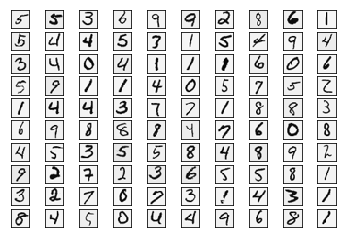

In [4]:
plt.figure()
rng = np.random.RandomState(0)
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[rng.randint(X.shape[0])].reshape((20, 20)).T,
               cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 1.3 Vectorizing Logistic Regression

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def lrCostFunction(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    grad = np.dot(X.T, h - y) / X.shape[0] + lam * t / X.shape[0]
    return J, grad

In [7]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.array([[1., 0.1, 0.6, 1.1],
                [1., 0.2, 0.7, 1.2],
                [1., 0.3, 0.8, 1.3],
                [1., 0.4, 0.9, 1.4],
                [1., 0.5, 1.0, 1.5]])
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3

In [8]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)
print(J)  # 2.534819
print(grad)  # 0.146561 -0.548558 0.724722 1.398003

2.5348193961097443
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


### 1.4 One-vs-all Classification

In [9]:
def cost(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    return J


def gradient(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    grad = np.dot(X.T, h - y) / X.shape[0] + lam * t / X.shape[0]
    return grad

In [10]:
def oneVsAll(X, y, num_labels, lam):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    all_theta = np.zeros((num_labels, X_train.shape[1]))
    for i in range(1, num_labels + 1):
        y_train = (y == i).astype(int)
        initial_theta = np.zeros(X_train.shape[1])
        res = optimize.minimize(fun=cost, x0=initial_theta,
                                args=(X_train, y_train, lam),
                                method='CG', jac=gradient)
        all_theta[i - 1] = res.x
    return all_theta

In [11]:
lam = 0.1
all_theta = oneVsAll(X, y, 10, lam)
print(all_theta)

[[-3.06448426e+00  0.00000000e+00  0.00000000e+00 ...  6.35134351e-03
   6.22215839e-08  0.00000000e+00]
 [-3.73270365e+00  0.00000000e+00  0.00000000e+00 ...  2.06896909e-02
  -2.31885442e-03  0.00000000e+00]
 [-5.70160163e+00  0.00000000e+00  0.00000000e+00 ... -7.10824817e-05
  -2.77422148e-07  0.00000000e+00]
 ...
 [-9.11676776e+00  0.00000000e+00  0.00000000e+00 ... -5.25385887e-04
   5.73418162e-05  0.00000000e+00]
 [-5.62441297e+00  0.00000000e+00  0.00000000e+00 ... -1.12141102e-02
   8.54257428e-04  0.00000000e+00]
 [-8.08157137e+00  0.00000000e+00  0.00000000e+00 ... -1.30318524e-04
   6.64212096e-06  0.00000000e+00]]


### 1.4.1 One-vs-all Prediction

In [12]:
def predictOneVsAll(all_theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    prob = np.dot(X_train, all_theta.T)
    pred = np.argmax(prob, axis=1) + 1
    return pred

In [13]:
np.mean(predictOneVsAll(all_theta, X) == y)

0.9646

## 2 Neural Networks

In [14]:
data = loadmat("ex3data1.mat")
X, y = data["X"], data["y"].ravel()

In [15]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [16]:
weight = loadmat("ex3weights.mat")
Theta1, Theta2 = weight["Theta1"], weight["Theta2"]

In [17]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


In [18]:
def predict(Theta1, Theta2, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    A2 = sigmoid(np.dot(X, Theta1.T))
    A2 = np.hstack((np.ones((A2.shape[0], 1)), A2))
    A3 = sigmoid(np.dot(A2, Theta2.T))
    pred = np.argmax(A3, axis=1) + 1
    return pred

In [19]:
print(np.mean(predict(Theta1, Theta2, X) == y))

0.9752
